# Alternus Vera 


Course code : **CMPE-257** 
    
Group name : **Codebusters**
    
Name: **Harini Balakrishnan (010830755)** 

-----

GitHub URL: https://github.com/HariniGB/MachineLearning/tree/master/AlternusVera


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    Column 1: the ID of the statement ([ID].json).
    Column 2: the label.
    Column 3: the statement.
    Column 4: the subject(s).
    Column 5: the speaker.
    Column 6: the speaker's job title.
    Column 7: the state info.
    Column 8: the party affiliation.
    Column 9-13: the total credit history count, including the current statement.
    9: barely true counts.
    10: false counts.
    11: half true counts.
    12: mostly true counts.
    13: pants on fire counts.
    Column 14: the context (venue / location of the speech or statement).

### Process Steps: 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
    - **Feature 1 :** Sentiment Analysis using Vader 
    - **Feature 2 :** LDA Topic Modelling
    - **Feature 3 :** Sensationalism Analysis using Cosin Similarity
- Counter Vectorization and classification models
- TF-IDF Vectorization  and classification models
- Word2Vec and TSNE Visualization
- Doc2Vec Embedment and classification models
- Compare Counter vs TF-IDF vs Doc2Vec 
- Vector Classification Modeling 
- Ranking and Importance


### Feature Selection
**Top Features Selected based on research articles**

1. Political Affliation
2. Sensationalism
3. Clickbait 
4. Context Modeling   
5. Spam  

*Other simple features as a part of distillation:*
6. Sentiment Analysis 
7. LDA Topic Modeling  
8. Ranking


### Team Contributions:

|Features  |  Member |
|-----|-----|
| Sensationalism                         |  Harini Balakrishnan|  
| Political Affliation                   |  Anushri Srinath Aithal| 
| Context Modeling                       |  Sunder Thyagarajan |   
| Clickbait                              |  Ravi   Katta|
| Spam                                   |  All Memebers|
 
 
### My Contributions:

| Versions | Features | DataEnrichment & Corpus | Explanation | 
|-----|-----|-----|-----|
| **Part 1**|  *Sentiment Analysis* | Vader Sentiment Intensity Analyser, SenticNet5 | Tokenization, Normalization, Stemming,  CounterVectorization, TF-IDF Vectorization, Doc2Vec and classification models  | 
| **Part 2**|  *Distillation* |    GoogleNews-vectors-negative300 |    Stop words, Lemmentization, Spell Check, LDA Topic Modeling, word2vec, lda2vec | 
| **Part 3**|  *Sensationalism* | The Persuasion Revolution Website | Doc2Vec, word2vec, TF-IDF Vectorization, Cosine Similarity, Compared three vectorization models| 

### Reading the Data

In [1]:
import pandas as pd
import numpy as np
import csv
import gensim

In [2]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


test_filename = 'input_data/test.tsv'
train_filename = 'input_data/train.tsv'
valid_filename = 'input_data/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [3]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


# Distillation 

**Step 1:** Data Cleaning and Text Preprocessing

**Step 2:** Sentiment analysis using Vader Sentiment Analyser 

**Step 3:** LDA Topic Modelling 

**Step 4:** TF-IDF and Cosine Similarity on Sensationalism 

**Step 5:** Doc2Vec based on Sensational Classification

## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

### 1. Remove Special Characters and Punctuations
Remove all Non-Letter Characters using Regular Expression

In [4]:
import re

example = train_news["headline_text"][0]
news = re.sub("[^a-zA-Z]", " ", example)
print("Before: ", example)
print("\nAfter: ", news)

Before:  Says the Annies List political group supports third-trimester abortions on demand.

After:  Says the Annies List political group supports third trimester abortions on demand 


### 2. Lower Case the news

In [5]:
print("Before: ", news)
news = news.lower()
print("\nAfter: ", news)

Before:  Says the Annies List political group supports third trimester abortions on demand 

After:  says the annies list political group supports third trimester abortions on demand 


### 3. Tokenization 
> Tokenization is the process splitting a sentence or paragraph into the most basic units.

In [6]:
# Import Natural Language Toolkit
import nltk

# Instead of using just split() method, used word_tokenize in nltk library.
print("Before: ", news)
news_words = nltk.word_tokenize(news)
print("\nAfter:   ", news_words)

Before:  says the annies list political group supports third trimester abortions on demand 

After:    ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


### 4. Remove Stop words 
> "Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library

In [7]:
from nltk.corpus import stopwords

print("List of Stop words: \n" , stopwords.words("english"))

List of Stop words: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [8]:
# Exclude the stop words from the original tokens.
words = [w for w in news_words if not w in set(stopwords.words("english"))]
print("\n\nBefore: \n", news_words)
print("\n\nAfter: \n", words)



Before: 
 ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


After: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']


#### Inferences: 
    
> As you can see the words "the" and "on" is removed

-----

### 5. Lemmatization

> The NLTK Lemmatization method is based on WordNet’s built-in morphy function. WordNet superficially resembles a thesaurus, in that it groups words together based on their meanings.

> Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. 

> For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet"

In [9]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
lem_words = [ wordnet_lem.lemmatize(w) for w in words ]
print("Before: \n", words )
print("\nAfter: \n", lem_words )

Before: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']

After: 
 ['say', 'annies', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']


### 6. Stemming

> Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi 

**Three major stemming algorithms:** 
- Porter *(Least aggressive)*
- Snowball
- Lancaster 


The **"aggressive algorithms"** means how much a working set of words are reduced. The *more aggressive* the algorithms, the *faster* it is; however, in some certain circumstances, it will hugely trim down your working set. 

Therefore, in this project I decide to use **snowball** since it is slightly ***faster than Porter and does not trim down too much information as Lancaster does***.

In [10]:
snow = nltk.stem.SnowballStemmer('english')

stems = [snow.stem(w) for w in lem_words ]
print("Before: \n", lem_words )
print("\nAfter: \n",stems )

Before: 
 ['say', 'annies', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']

After: 
 ['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand']


#### Inferences: 
    
> As you can see the word "says", it is converted to "say" and "political", "supports" and "abortions" are converted to "polit", "support" and "abort"

###  Putting It All Together 

So far, we have cleaned only the first article to understand the difference in each step. 
Now it's time to apply all the cleaning process to the entire corpus (all rows). 
To make the code reusable, we need to create a function that can be called many times.

In [11]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [12]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.1433615485827128 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.01702648401260376 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.017993120352427165 min


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [13]:
model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [14]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [15]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [16]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 5.663163348038991 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [17]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.6300022164980571 min


In [18]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.6891986012458802 min


##### Saved the trained dataset into a seperate CSV file 

In [19]:
train_news.to_csv("input_data/train_processed.csv", sep=',')
test_news.to_csv("input_data/test_processed.csv", sep=',')
valid_news.to_csv("input_data/valid_processed.csv", sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

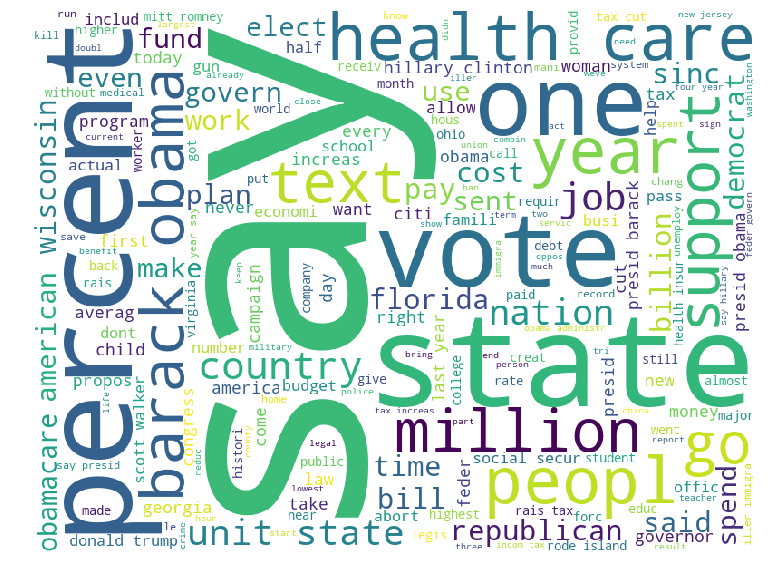

In [21]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

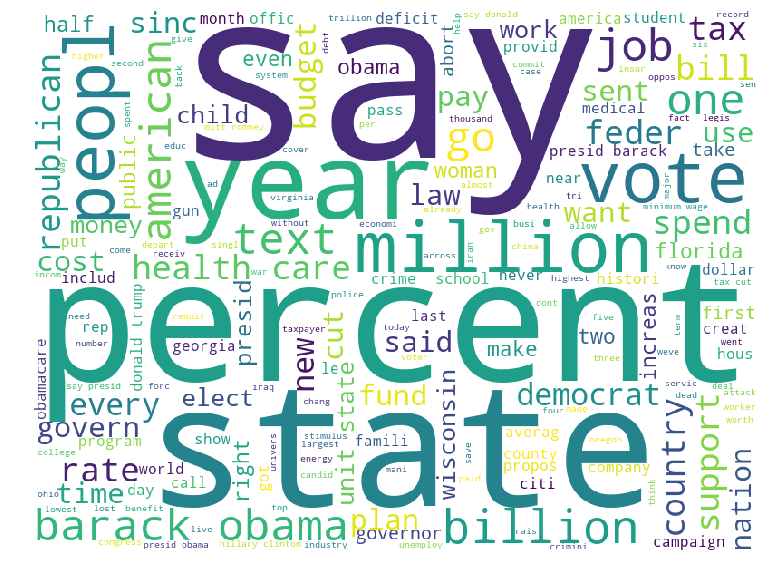

In [22]:
cloud(' '.join(test_news['clean']))

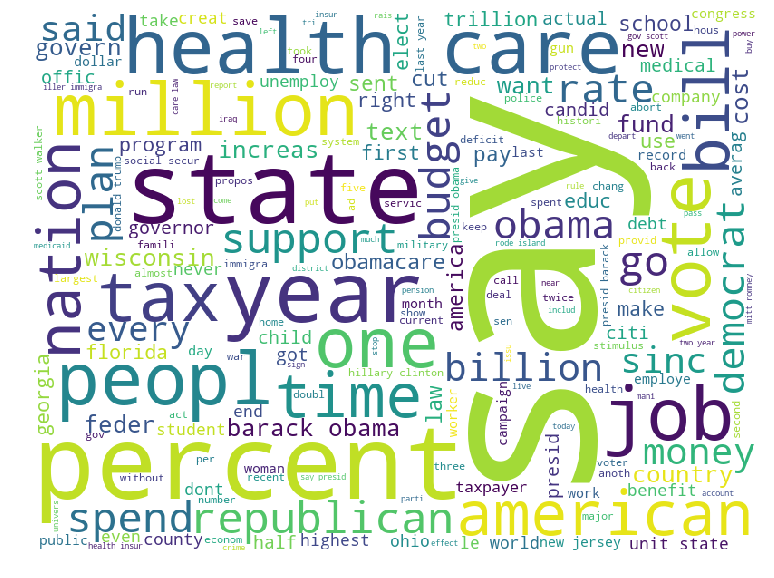

In [23]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus


## Sentiment analysis using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [24]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


/Users/harinibalakrishnan/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [25]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [26]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [27]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.562, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.335, 0.6, 0.065, -0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.153, 0.657, 0.19, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.108, 0.773, 0.119, 0.0516]
[0, 0.198, 0.802, 0.0, -0.4939]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]


[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.206, 0.601, 0.193, -0.0754]
[0, 0.358, 0.642, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.173, 0.714, 0.112, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.424, 0.576, 0.7783]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.748, 0.252, 0.4019]
[0, 0.0, 0.747, 0.253, 0.2584]
[0, 0.262, 0.738, 0.0, -0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.254, 0.592, 0.154, -0.4019]
[0, 0.113, 0.887, 0.0, -0.3182]
[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.073, 0.622, 0.306, 0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.545, 0.455, 0.0, -0.5574]
[0, 0.0, 0.894, 0.106, 0.0772]
[0, 0.118, 0.73, 0.152, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.647, 0.353, 0.6124]
[0, 0.0, 0.603, 0.397, 0.7096]
[0, 0.135, 0.675, 0.19, 0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.649, 0.351, 0.0, -0.7506]
[0, 0.412, 0.588, 0.0, -0.7906]
[0, 0.

[0, 0.0, 0.656, 0.344, 0.575]
[0, 0.0, 0.645, 0.355, 0.6705]
[0, 0.0, 0.583, 0.417, 0.6124]
[0, 0.0, 0.661, 0.339, 0.6249]
[0, 0.247, 0.43, 0.323, 0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.273, 0.727, 0.0, -0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.333, 0.667, 0.0, -0.4588]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 0.602, 0.398, 0.6808]
[0, 0.27, 0.562, 0.169, -0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.784, 0.216, 0.3566]
[0, 0.0, 0.87, 0.13, 0.128]
[0, 0.172, 0.491, 0.337, 0.7506]
[0, 0.333, 0.667, 0.0, -0.25]
[0, 0.331, 0.493, 0.176, -0.296]
[0, 0.127, 0.55, 0.323, 0.6908]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.682, 0.318, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.352, 0.549, 0.099, -0.6808]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.404, 0.596, 0.0, -0.7269]
[0, 0.277, 0.723, 0.0, -

[0, 0.0, 0.683, 0.317, 0.6249]
[0, 0.375, 0.625, 0.0, -0.5574]
[0, 0.249, 0.751, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.385, 0.497, 0.118, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.247, 0.753, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.816, 0.184, 0.4019]
[0, 0.344, 0.656, 0.0, -0.2732]
[1, 0.0, 0.486, 0.514, 0.9136]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.87, 0.13, 0.2732]
[0, 0.0, 0.606, 0.394, 0.0772]
[0, 0.236, 0.606, 0.158, -0.3182]
[0, 0.254, 0.746, 0.0, -0.5267]
[0, 0.415, 0.585, 0.0, -0.7964]
[0, 0.112, 0.804, 0.084, -0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.493, 0.507, 0.7351]
[0, 0.1, 0.574, 0.325, 0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.531, 0.469, 0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.55

[0, 0.0, 0.606, 0.394, 0.6369]
[0, 0.327, 0.673, 0.0, -0.7783]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.4, 0.6, 0.0, -0.4588]
[0, 0.362, 0.638, 0.0, -0.7783]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.084, 0.764, 0.153, 0.2263]
[0, 0.247, 0.619, 0.134, -0.2732]
[0, 0.388, 0.612, 0.0, -0.5859]
[0, 0.0, 0.841, 0.159, 0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.894, 0.106, 0.1695]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.551, 0.449, 0.0, -0.8225]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.351, 0.649, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.421, 0.526, 0.053, -0.8658]
[0, 0.129, 0.538, 0.333, 0.5859]
[0, 0.423, 0.577, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.502, 0.498, 0.0, -0.9201]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0,

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.335, 0.581, 0.084, -0.5994]
[0, 0.394, 0.606, 0.0, -0.3818]
[0, 0.208, 0.708, 0.084, -0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.756, 0.244, 0.4939]
[0, 0.25, 0.75, 0.0, -0.25]
[0, 0.163, 0.837, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.179, 0.821, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.406, 0.594, 0.0, -0.6249]
[1, 0.289, 0.333, 0.378, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.719, 0.281, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.29, 0.538, 0.172, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.302, 0.698, 0.0, -0.3818]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.896, 0.104, 0.2732]
[0, 0.152, 0.652, 0.196, 0.1531]
[0, 0.0, 0.577, 0.423, 0.765]
[0, 0.0, 0.661, 0.339, 0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.08, 0.92, 0.0, -0.1027]
[0, 0.104, 0.732, 0.165, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1

[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.645, 0.355, 0.0, -0.8779]
[-1, 0.744, 0.256, 0.0, -0.9118]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.313, 0.556, 0.131, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.852, 0.148, 0.3818]
[0, 0.343, 0.657, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.645, 0.355, 0.5267]
[0, 0.293, 0.707, 0.0, -0.4404]
[0, 0.16, 0.535, 0.305, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.188, 0.684, 0.128, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.642, 0.273, 0.5445]
[0, 0.0, 0.769, 0.231, 0.2023]
[0, 0.185, 0.664, 0.152, -0.1779]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.358, 0.642, 0.0, -0.5994]
[0, 0.206, 0.581, 0.213, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.809, 0.191, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.119, 0.734, 0.147, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.416, 0.458, 0.126, -0.6197]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0,

[-1, 0.565, 0.435, 0.0, -0.8316]
[0, 0.265, 0.735, 0.0, -0.5574]
[0, 0.115, 0.628, 0.257, 0.4019]
[0, 0.189, 0.811, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.442, 0.455, 0.103, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.262, 0.738, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.812, 0.188, 0.101]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.101, 0.642, 0.257, 0.7269]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.116, 0.732, 0.152, 0.1531]
[0, 0.392, 0.608, 0.0, -0.7964]
[0, 0.485, 0.515, 0.0, -0.886]
[0, 0.127, 0.636, 0.236, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.196, 0.467, 0.336, 0.3612]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.443, 0.557, 0.0, -0.7306]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.476, 0.524, 0.872]
[0, 0.437, 0.563, 0.0, -0.8439]
[0, 0.342, 0.658, 0.0, -0.3818]

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.707, 0.293, 0.4404]
[0, 0.367, 0.633, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.349, 0.465, 0.186, -0.4215]
[0, 0.219, 0.781, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.16, 0.717, 0.123, -0.2732]
[0, 0.077, 0.656, 0.268, 0.5423]
[0, 0.0, 0.595, 0.405, 0.7783]
[0, 0.327, 0.673, 0.0, -0.7783]
[0, 0.126, 0.631, 0.243, 0.3182]
[0, 0.159, 0.568, 0.273, 0.25]
[0, 0.0, 0.803, 0.197, 0.4019]
[-1, 0.706, 0.294, 0.0, -0.8625]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.828, 0.172, 0.4019]
[0, 0.197, 0.606, 0.197, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.651, 0.349, 0.7096]
[0, 0.286, 0.714, 0.0, -0.4215]
[-1, 0.562, 0.438, 0.0, -0.875]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.86, 0.14, 0.0772]
[-1, 0.651, 0.349, 0.0, -0.6808]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.144, 0.856, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.208, 0.495, 0.297, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.25, 0.75, 0.0, -0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.266, 0.734, 0.0, -0.6908]
[0, 0.289, 0.711, 0.0, -0.6908]
[0, 0.0, 0.656, 0.344, 0.2732]
[-1, 0.574, 0.426, 0.0, -0.6597]
[0, 0.17, 0.654, 0.176, 0.0516]
[0, 0.0, 0.789, 0.211, 0.4939]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.0, 0.769, 0.231, 0.4019]
[0, 0.0, 0.86, 0.14, 0.0772]
[0, 0.0, 0.502, 0.498, 0.8979]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.135, 0.702, 0.164, 0.128]
[0, 0.0, 0.734, 0.266, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.174, 0.826, 0.0, -0.2732]
[0, 0.0, 0.592, 0.408, 0.7096]
[0, 0.0, 0.609, 0.391, 0.7717]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.157, 0.562, 0.281, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.097, 0.903, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.371, 0.629, 0.0, -0.7096]
[0, 0.281, 0.

[-1, 0.542, 0.458, 0.0, -0.8074]
[0, 0.0, 0.847, 0.153, 0.4404]
[0, 0.237, 0.763, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.292, 0.564, 0.144, -0.4404]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.195, 0.805, 0.0, -0.4404]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.208, 0.628, 0.164, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.814, 0.186, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.816, 0.0, -0.4019]
[0, 0.356, 0.455, 0.189, -0.4939]
[0, 0.0, 0.848, 0.152, 0.3612]
[0, 0.253, 0.747, 0.0, -0.6597]
[0, 0.266, 0.462, 0.272, -0.2263]
[0, 0.0, 0.732, 0.268, 0.296]
[0, 0.0, 0.833, 0.167, 0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.789, 0.211, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.544, 0.456, 0.0, -0.936]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.542, 0.395, 0.062, -0.8591]
[0, 0.093, 0.728, 0.179, 0.3182]
[0, 0.136, 0.68, 0.184, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.777, 0.223, 0.3182

[0, 0.104, 0.896, 0.0, -0.1027]
[0, 0.084, 0.599, 0.317, 0.5994]
[0, 0.0, 0.89, 0.11, 0.2732]
[0, 0.257, 0.743, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.747, 0.253, 0.0, -0.9153]
[0, 0.0, 0.753, 0.247, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.202, 0.645, 0.153, -0.1531]
[0, 0.205, 0.574, 0.221, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.597, 0.403, 0.4019]
[0, 0.275, 0.725, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.188, 0.537, 0.275, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.718, 0.282, 0.7096]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.217, 0.783, 0.0, -0.6908]
[0, 0.343, 0.523, 0.134, -0.5574]
[0, 0.218, 0.782, 0.0, -0.5994]
[0, 0.141, 0.541, 0.319, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.402, 0.598, 0.0, -0.6908]
[-1, 0.681, 0.319, 0.0, -0.7506]
[0, 0.364, 0.465, 0.171, -0.5423]
[0, 0.0, 0.656, 0.344, 0.6369]
[0, 0.385, 0.615, 0.0, -0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.465, 0.202, -0.4019]
[

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.0, 0.884, 0.116, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.198, 0.472, 0.33, 0.34]
[0, 0.351, 0.649, 0.0, -0.4019]
[0, 0.327, 0.673, 0.0, -0.5267]
[0, 0.339, 0.661, 0.0, -0.6249]
[0, 0.0, 0.825, 0.175, 0.3724]
[0, 0.365, 0.635, 0.0, -0.6151]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.0, 0.638, 0.362, 0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.815, 0.185, 0.3612]
[0, 0.0, 0.833, 0.167, 0.296]
[1, 0.152, 0.326, 0.522, 0.5267]
[0, 0.216, 0.784, 0.0, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.172, 0.621, 0.207, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.397, 0.603, 0.0, -0.5574]
[0, 0.0, 0.78, 0.22, 0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.791, 0.209, 0.4404]
[0, 0.438, 0.562, 0.0, -0.5994]
[0, 0.0, 0.886, 0.114, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.659, 0.341, 0.7351]
[0, 0.0, 

[0, 0.22, 0.78, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.245, 0.755, 0.0, -0.3818]
[-1, 0.538, 0.462, 0.0, -0.5423]
[0, 0.255, 0.511, 0.234, 0.1779]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.263, 0.737, 0.0, -0.3612]
[0, 0.254, 0.493, 0.254, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.759, 0.241, 0.0, -0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.193, 0.625, 0.182, -0.0516]
[0, 0.189, 0.811, 0.0, -0.2732]
[-1, 1.0, 0.0, 0.0, -0.5994]
[0, 0.368, 0.632, 0.0, -0.5423]
[0, 0.082, 0.667, 0.251, 0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.756, 0.244, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.271, 0.561, 0.168, -0.2732]
[0, 0.286, 0.714, 0.0, -0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.185, 0.692, 0.123, -0.1531]
[0, 0.085, 0.915, 0.0, -0.1027]
[0, 0.0, 0.636, 0.364, 0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.756, 0.244, 0.4404]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 1.0, 0.0, 0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.311, 0.689, 0.0, -0.3089]
[0, 0.305, 0.695, 0.0, -0.6908]
[0, 0.257, 0.476, 0.267, 0.0253]
[0, 0.185, 0.674, 0.14, -0.2023]
[0, 0.0, 0.729, 0.271, 0.3818]
[0, 0.226, 0.774, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.724, 0.276, 0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.122, 0.878, 0.0, -0.3612]
[0, 0.429, 0.571, 0.0, -0.6705]
[0, 0.0, 0.863, 0.137, 0.4019]
[0, 0.0, 0.833, 0.167, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.146, 0.73, 0.124, -0.1027]
[0, 0.179, 0.821, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.674, 0.166, 0.0258]
[0, 0.241, 0.759, 0.0, -0.5423]
[0, 0.0, 0.826, 0.174, 0.2732]
[0, 0.133, 0.867, 0.0, -0.3182]
[0, 0.115, 0.885, 0.0, -0.296]
[0, 0.0, 1.0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.194, 0.806, 0.0, -0.34]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.127, 0.873, 0.0, -0.1531]
[0, 0.0, 0.828, 0.172, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.845, 0.155, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.815, 0.185, 0.3612]
[0, 0.124, 0.876, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.893, 0.107, 0.0516]
[0, 0.0, 0.714, 0.286, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.839, 0.161, 0.3612]
[0, 0.0, 0.843, 0.157, 0.4215]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.732, 0.268, 0.5267]
[0, 0.223, 0.638, 0.138, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.089, 0.65, 0.26, 0.6369]
[1, 0.194, 0.185, 0.62, 0.5574]
[0, 0.351, 0.649, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.099, 0.745, 0.155, 0.2263]
[0, 0.32, 0.68, 0.0, -0.6908]
[0, 0.0, 1.0

[0, 0.291, 0.709, 0.0, -0.4019]
[-1, 0.67, 0.33, 0.0, -0.7269]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.431, 0.569, 0.0, -0.6486]
[0, 0.0, 0.631, 0.369, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.37, 0.63, 0.0, -0.6908]
[0, 0.0, 0.814, 0.186, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.318, 0.531, 0.151, -0.6249]
[0, 0.15, 0.85, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.25, 0.75, 0.0, -0.6124]
[0, 0.0, 0.69, 0.31, 0.5423]
[0, 0.223, 0.777, 0.0, -0.6486]
[0, 0.148, 0.852, 0.0, -0.3089]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.153, 0.847, 0.0, -0.4404]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.0, 0.839, 0.161, 0.3612]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.167, 0.833, 0.0, -0.1027]
[0, 0.263, 0.737, 0.0, -0.3612]
[0, 0.0, 0.822, 0.178, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0,

[0, 0.0, 0.773, 0.227, 0.6249]
[1, 0.0, 0.459, 0.541, 0.7096]
[0, 0.0, 0.794, 0.206, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.254, 0.746, 0.0, -0.6249]
[0, 0.187, 0.813, 0.0, -0.3182]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.783, 0.217, 0.3612]
[0, 0.299, 0.597, 0.104, -0.5994]
[0, 0.455, 0.545, 0.0, -0.7579]
[0, 0.201, 0.604, 0.195, -0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.184, 0.816, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.597, 0.403, 0.0, -0.8126]
[0, 0.261, 0.435, 0.304, 0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.661, 0.339, 0.4767]
[0, 0.286, 0.714, 0.0, -0.6808]
[-1, 0.759, 0.241, 0.0, -0.743]
[0, 0.0, 0.737, 0.263, 0.4449]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.61, 0.39, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.824, 0.176, 0.493

In [28]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [29]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

[0, 0.0, 0.727, 0.273, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.916, 0.084, 0.2732]
[0, 0.185, 0.617, 0.198, 0.0516]
[0, 0.223, 0.777, 0.0, -0.3182]
[0, 0.0, 0.925, 0.075, 0.0772]
[0, 0.0, 0.916, 0.084, 0.0258]
[0, 0.0, 0.847, 0.153, 0.2023]
[-1, 0.69, 0.31, 0.0, -0.836]
[0, 0.167, 0.546, 0.288, 0.2235]
[0, 0.0, 0.606, 0.394, 0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.209, 0.522, 0.269, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.896, 0.104, 0.2732]
[0, 0.1, 0.813, 0.086, -0.0772]
[0, 0.0, 0.746, 0.254, 0.5267]
[0, 0.092, 0.746, 0.162, 0.9811]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.379, 0.621, 0.0, -0.6705]
[0, 0.122, 0.767, 0.111, -0.0772]
[1, 0.0, 0.488, 0.512, 0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.762, 0.238, 0.3612]
[0, 0.0, 0.526, 0.474, 0.4019]
[0, 0.093, 0.636, 0.271, 0.6369]
[0, 0.068, 0.643, 0.289, 0.7845]
[0, 0.0, 0.792, 0.208, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.44, 0.56, 0.0, -0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.852, 0.

In [30]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [31]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.321, 0.489, 0.19, -0.5267]
[0, 0.0, 0.878, 0.122, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.0, 0.863, 0.137, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.403, 0.597, 0.0, -0.4019]
[0, 0.0, 0.756, 0.244, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.324, 0.441, 0.235, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.135, 0.865, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.833, 0.0, -0.34]
[0, 0.164, 0.746, 0.09, -0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.579, 0.421, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.894, 0.106, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.3412]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.542, 0.458, 0.6808]
[0, 0.351, 0.649, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.879, 0.121, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]


In [32]:
valid_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


##### Saved the trained dataset into a seperate CSV file 

In [33]:
train_news.to_csv("input_data/train_sentiment.csv", sep=',')
test_news.to_csv("input_data/test_sentiment.csv", sep=',')
valid_news.to_csv("input_data/valid_sentiment.csv", sep=',')

## LDA Topic Modelling 


In [34]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [35]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [36]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


#### Split the clean news into list of words

In [37]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [48]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [49]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [50]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [51]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [52]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [53]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [54]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [55]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [56]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [57]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['vote', 'sent', 'republican', 'support', 'state', 'democrat', 'obama', 'romney', 'percent', 'would']
1::['percent', 'state', 'time', 'averag', 'american', 'school', 'year', 'hous', 'billion', 'rais']
2::['presid', 'obama', 'country', 'bill', 'barack', 'state', 'bush', 'year', 'billion', 'florida']
3::['year', 'percent', 'school', 'would', 'budget', 'public', 'every', 'state', 'obama', 'spend']
4::['obama', 'state', 'nation', 'said', 'million', 'peopl', 'work', 'presid', 'clinton', 'text']
5::['percent', 'year', 'million', 'state', 'obama', 'time', 'rate', 'peopl', 'presid', 'wisconsin']
6::['percent', 'increas', 'american', 'peopl', 'state', 'year', 'health', 'sinc', 'care', 'vote']
7::['year', 'last', 'state', 'million', 'health', 'vote', 'creat', 'number', 'nation', 'would']
8::['health', 'care', 'state', 'year', 'cost', 'would', 'percent', 'plan', 'insur', 'budget']
9::['state', 'trump', 'unit', 'donald', 'georgia', 'want', 'clinton', 'percent', 'feder', 'iller']


#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [58]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [60]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['state', 'unit', 'court', 'world', 'mexico', 'know', 'feder', 'come', 'call', 'said']
1::['percent', 'incom', 'state', 'trump', 'donald', 'year', 'nation', 'averag', 'unit', 'popul']
2::['health', 'care', 'year', 'rate', 'bill', 'unemploy', 'percent', 'every', 'vote', 'billion']
3::['state', 'billion', 'year', 'romney', 'help', 'vote', 'creat', 'florida', 'mitt', 'white']
4::['percent', 'obama', 'year', 'presid', 'romney', 'time', 'busi', 'state', 'offic', 'health']
5::['million', 'year', 'republican', 'sign', 'percent', 'school', 'georgia', 'state', 'street', 'three']
6::['peopl', 'year', 'state', 'health', 'union', 'paul', 'democrat', 'american', 'today', 'percent']
7::['budget', 'year', 'percent', 'obama', 'presid', 'increas', 'country', 'deficit', 'state', 'rick']
8::['iller', 'obama', 'percent', 'secur', 'obamacare', 'social', 'immigra', 'presid', 'plan', 'medical']
9::['rais', 'vote', 'obama', 'woman', 'clinton', 'percent', 'dollar', 'hillary', 'american', 'year']


#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [61]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [65]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642192,obama state nation said million peopl work pre...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930747,percent year million state obama time rate peo...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486903,percent increas american peopl state year heal...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654537,health care state year cost would percent plan...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.453796,year last state million health vote creat numb...


In [66]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.620917,obama state nation said million peopl work pre...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.620392,year last state million health vote creat numb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.547035,health care state year cost would percent plan...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849978,health care state year cost would percent plan...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,...,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574275,health care state year cost would percent plan...


In [67]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699910,obama state nation said million peopl work pre...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.599025,presid obama country bill barack state bush ye...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.557704,obama state nation said million peopl work pre...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,4,0.849964,obama state nation said million peopl work pre...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,0,0.575574,vote sent republican support state democrat ob...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

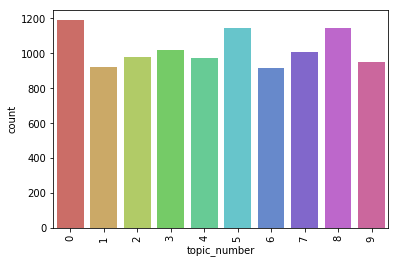

In [69]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

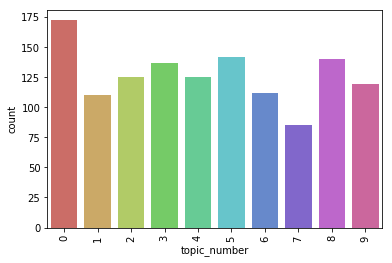

In [70]:
create_distribution(test_news)# TEST Document Vector

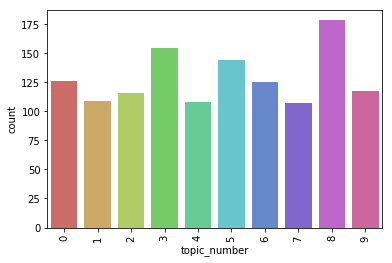

In [71]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [72]:
train_news.to_csv("input_data/train_lda.csv", sep=',')
test_news.to_csv("input_data/test_lda.csv", sep=',')
valid_news.to_csv("input_data/valid_lda.csv", sep=',')

## Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [81]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('input_data/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


#### SenticNet:  

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [82]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('input_data/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [83]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [85]:
tfidf_corpus.toarray()

array([[0.        , 0.32825702, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [87]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [88]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
print('Valid dim:', valid_tfidf.shape)
print(valid_tfidf.A[:10])

Training dim: (10240, 1000)
[[0.         0.32825702 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Test dim: (1267, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Valid dim: (1284, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [89]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [90]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642192,obama state nation said million peopl work pre...,0.062867
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930747,percent year million state obama time rate peo...,0.082037
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486903,percent increas american peopl state year heal...,0.066665
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654537,health care state year cost would percent plan...,0.045124
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.453796,year last state million health vote creat numb...,0.102477


In [91]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.620917,obama state nation said million peopl work pre...,0.080045
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.620392,year last state million health vote creat numb...,0.058766
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.547035,health care state year cost would percent plan...,0.060812
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849978,health care state year cost would percent plan...,0.043057
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,...,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574275,health care state year cost would percent plan...,0.095836


##### Saved the latest dataset into a seperate CSV file 

In [92]:
train_news.to_csv("input_data/train_cosin.csv", sep=',')
test_news.to_csv("input_data/test_cosin.csv", sep=',')
valid_news.to_csv("input_data/valid_cosin.csv", sep=',')

### Word2Vec 

> In general, there are two types of architecture options: skip-gram (default) and CBOW (continuous bag of words). Most of time, skip-gram is little bit slower but has more accuracy than CBOW. CBOW is the method to predict one word by whole text; therefore, small set of data is more favorable. On the other hand, skip-gram is totally opposite to CBOW. With the target word, skip-gram is the method to predict the words around the target words. The more data we have, the better it performs. As the architecture, there are two training algorithms for Word2Vec: Hierarchical softmax (default) and negative sampling. We will be using the default.

In [93]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

**Worker threads :** Number of parallel processes to run. One thing to remember here is that unlike sklearn, it does not accept -1 option to use all the processors. 

**Downsampling of frequent words :** According to the Google documentation, values between 0.00001 and 0.001 would suffice. 

**Context :** How many words around the target word will be used? 

**Minimum word count:** This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. The reason why I chose 40 is that there are 30 reviews in each movie and repeat the title 30 times; therefore in order to avoid attaching too much importance to individual movie titles, I set to 40. 

In [94]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)   

In [95]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [96]:
# Unload unneccessary memory once the learning process is done.
train_w2v.init_sims(replace = True)

In [97]:
train_w2v.most_similar("trump")

[('donald', 0.9868156909942627),
 ('said', 0.9751760959625244),
 ('say', 0.9738053679466248),
 ('hillary', 0.9728027582168579),
 ('want', 0.9692378044128418),
 ('clinton', 0.9658411145210266),
 ('support', 0.9633400440216064),
 ('campaign', 0.9612870812416077),
 ('candid', 0.9595848321914673),
 ('mccain', 0.9591343402862549)]

#### Visualization

> As the Word2Vec has more than two features, it is hard to directly plot the whole data. We will be using the technique called t-SNE so that we can reduce the dimensions from 250 to 2, which enables to visualize more human-friendly and see the relationship among points (words).

In [98]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(train_w2v.wv.vocab)

# index vector values by corresponding vocab list

X = train_w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])


Total Number of Vocab: 549

[-0.02702591  0.08537164  0.13539504 -0.06999481 -0.0613372   0.01347013
  0.0872096   0.01397484 -0.0955983   0.00603637]


In [99]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

,X,Y
say,-5.552030,2.146017
polit,-0.799374,0.985965
group,-0.533170,0.784762
support,-4.860143,1.215869
third,3.963530,1.540748


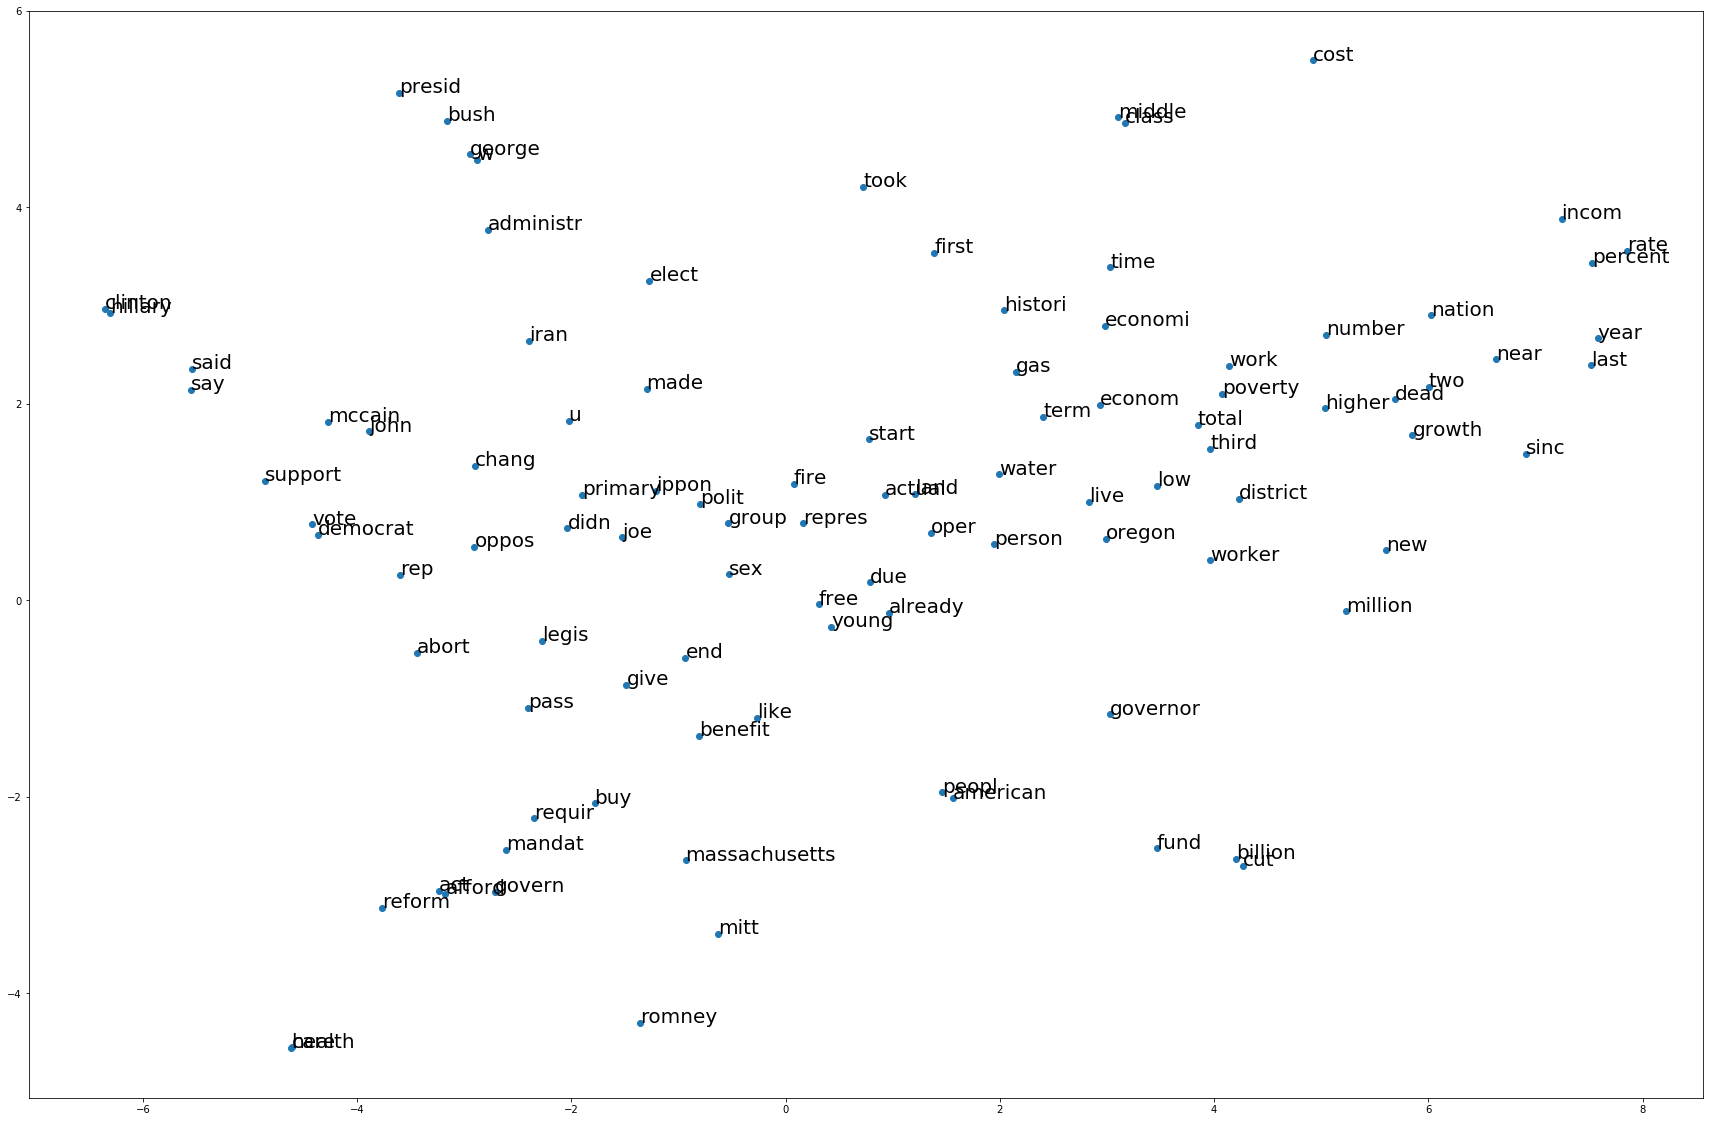

In [100]:
fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

#### Inferences: 

Compared to the previous methods' (CountVectorizer, TF-IDF) WordCloud, it appears more informative and based on the above plot, we can capture the general shape of the news. 

- For instance, if you see the bottom right corner words grouping, the 'clinton' word comes with 'hillary' in many news and the words like'democrat', 'support', 'vote' comes closer as most of the news of Hillary Clinton has these words.   

## Sensationalism  Classification

> Sensationalism is a type of editorial bias in mass media in which events and topics in news stories and pieces are overhyped to present biased impressions on events, which may cause a manipulation to the truth of a story.

> We’ve all seen those sensationalized headlines, things like: “Top 10 Reasons Why Doctors Hate Us and You Won’t Believe What Happens Next!” If the headline looks like it’s meant to catch your attention, but it doesn’t necessarily tell you anything about the article itself, not only could this just be click-bait, but it might also just mean that the article itself doesn’t have useful information either. So if a headline seems to be using all the right words to get you to click, be extra careful and skeptical as you read.

[How Sensational News Stories Distract Us From Real Crises](https://www.thenation.com/article/how-sensational-news-stories-distract-us-real-crises/)

> This article talks about the importance of sensational features of a news that affects us from the original content. 

In [120]:
sensational = [] 

for row in train_news['sensational_score']:
    if row > 0.05:
        sensational.append(1)
    else:
        sensational.append(0) 

train_news['sensational_label'] = sensational
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score,sensational_label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642192,obama state nation said million peopl work pre...,0.062867,1
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930747,percent year million state obama time rate peo...,0.082037,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486903,percent increas american peopl state year heal...,0.066665,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654537,health care state year cost would percent plan...,0.045124,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.453796,year last state million health vote creat numb...,0.102477,1


In [121]:
sensational = [] 

for row in test_news['sensational_score']:
    if row > 0.05:
        sensational.append(1)
    else:
        sensational.append(0) 

test_news['sensational_label'] = sensational
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score,sensational_label
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.620917,obama state nation said million peopl work pre...,0.080045,1
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.620392,year last state million health vote creat numb...,0.058766,1
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.547035,health care state year cost would percent plan...,0.060812,1
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849978,health care state year cost would percent plan...,0.043057,0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,...,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574275,health care state year cost would percent plan...,0.095836,1


## Sensational Feature Distribution 

**Distribution of classes for prediction**
By calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes

In [122]:
def create_distribution(dataFile):
    return sb.countplot(x='sensational_label', data=dataFile, palette='hls')

#### Distribution for Train News

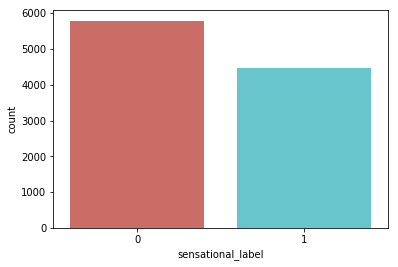

In [123]:
create_distribution(train_news)

#### Distribution for Test News

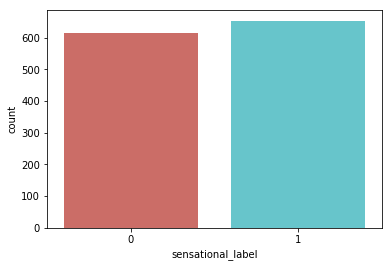

In [124]:
create_distribution(test_news)

## Count Vectorization

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3))

In [126]:
# As mentioned many times, the matrix is going to be huge 
# so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [127]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.
train_bw = pipe.fit_transform(train_news['clean'])

# We only call transform not fit_transform due to the risk of overfitting.
test_bw = pipe.transform(test_news['clean'])
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (10240, 152730) test dim: (1267, 152730)


In [128]:
# Get the name fo the features
countV_features = vectorizer.get_feature_names()
print(countV_features[:25])

['aa', 'aa aaa', 'aa aaa bond', 'aaa', 'aaa bond', 'aaa bond rate', 'aaa credit', 'aaa credit rate', 'aaron', 'aaron bean', 'aaron bean vote', 'aarp', 'aarp consist', 'aarp consist communis', 'aarp largest', 'aarp largest rebel', 'aarp say', 'aarp say health', 'aarp vendors', 'aarp vendors health', 'aba', 'aba criterion', 'aba criterion judicial', 'abandon', 'abandon dollar']


In [129]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = countV_features)
train_sum.head()

,aa,aa aaa,aa aaa bond,aaa,aaa bond,aaa bond rate,aaa credit,aaa credit rate,aaron,aaron bean,...,zone text,zone text state,zoo,zoo without,zoo without county,zuckerberg,zuckerberg le,zuckerberg le two,zuckerberg person,zuckerberg person sent
0,1,1,1,3,1,1,2,2,2,2,...,1,1,1,1,1,2,1,1,1,1


### Classifier Modeling using CountVectorizer 

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

##### Building Classifier using Naives Bayes regression

In [131]:
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())])

nb_pipeline.fit(train_news['clean'],train_news['sensational_label'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['sensational_label'])

0.5990528808208366

#### Building Classifier using Logistic regression

In [132]:
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',LogisticRegression())
        ])
logR_pipeline.fit(train_news['clean'],train_news['sensational_label'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['sensational_label'])

0.632991318074191

##### Building Classifier using Linear SVM Classifier

In [133]:
svm_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['sensational_label'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['sensational_label'])

0.6337805840568271

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [134]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['sensational_label'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['sensational_label'])

0.6345698500394633

##### Building Classifier using RandomForestClassifier

In [135]:
#random forest
random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['clean'],train_news['sensational_label'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['sensational_label'])

0.6172059984214681

### Models performance Comparison 

In [143]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['sensational_label']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['sensational_label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    print('Total statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#### K-fold cross validation for all classifiers

> Classification Model Evaluation Technique
KFold is cross validation technique used to evaluate model performance. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation.

Total statements classified:10240
Score:0.7270182466267326
Score length:5


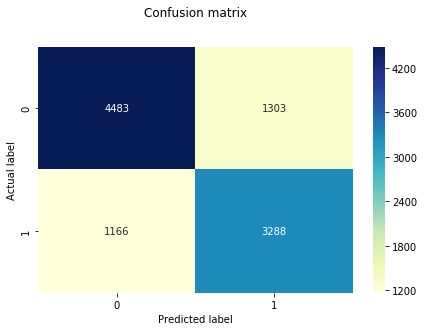

In [144]:
build_confusion_matrix(nb_pipeline)

Total statements classified:10240
Score:0.8380540930548899
Score length:5


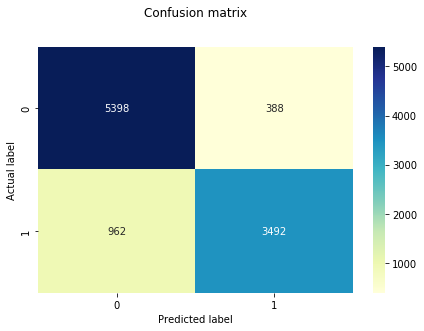

In [145]:
build_confusion_matrix(logR_pipeline)

Total statements classified:10240
Score:0.84911480114438
Score length:5


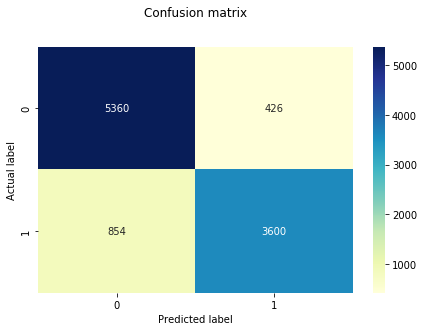

In [146]:
build_confusion_matrix(svm_pipeline)

Total statements classified:10240
Score:0.8390026110786722
Score length:5


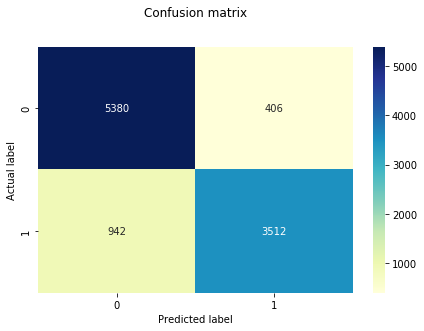

In [147]:
build_confusion_matrix(sgd_pipeline)

In [150]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['sensational_label'], predicted_nb))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['sensational_label'], predicted_LogR))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['sensational_label'], predicted_svm))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['sensational_label'], predicted_sgd))
print("\n Classification Report of RandomForestClassifier: \n")
print(classification_report(test_news['sensational_label'], predicted_rf))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.57      0.66      0.62       614
           1       0.63      0.54      0.58       653

   micro avg       0.60      0.60      0.60      1267
   macro avg       0.60      0.60      0.60      1267
weighted avg       0.60      0.60      0.60      1267


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       614
           1       0.69      0.52      0.59       653

   micro avg       0.63      0.63      0.63      1267
   macro avg       0.64      0.64      0.63      1267
weighted avg       0.65      0.63      0.63      1267


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       614
           1       0.68      0.54      0.60       653

   micro avg       0.63   

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with CounterVectorizer seems to be 63.4% accurate. 

## TF-IDF Vectorization on Sensationalism 

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [152]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training dim: (10240, 152730)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1267, 24467)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [153]:
tfidfV.vocabulary_

{'build': 2444,
 'wall': 23246,
 'mexico': 12643,
 'border': 2161,
 'take': 20961,
 'liter': 11666,
 'year': 24188,
 'build wall': 2456,
 'wall mexico': 23249,
 'mexico border': 12644,
 'border take': 2174,
 'take liter': 20983,
 'liter year': 11675,
 'build wall mexico': 2457,
 'wall mexico border': 23250,
 'mexico border take': 12646,
 'border take liter': 2175,
 'take liter year': 20984,
 'wisconsin': 23714,
 'pace': 14677,
 'doubl': 5937,
 'number': 13895,
 'layoff': 11255,
 'wisconsin pace': 23752,
 'pace doubl': 14678,
 'doubl number': 5944,
 'number layoff': 13909,
 'layoff year': 11256,
 'wisconsin pace doubl': 23753,
 'pace doubl number': 14679,
 'doubl number layoff': 5945,
 'number layoff year': 13910,
 'say': 18397,
 'john': 10656,
 'mccain': 12379,
 'done': 5873,
 'noth': 13849,
 'help': 9249,
 'vet': 22881,
 'say john': 18599,
 'john mccain': 10669,
 'mccain done': 12386,
 'done noth': 5880,
 'noth help': 13860,
 'help vet': 9285,
 'say john mccain': 18600,
 'john mccain 

In [154]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

['aaa', 'aaa bond', 'aaa bond rate', 'abbott', 'abbott activ', 'abbott activ state', 'abel', 'abel spent', 'abel spent taxpayer', 'abercrombie', 'abercrombie made', 'abercrombie made late', 'abil', 'abil stimuli', 'abil stimuli job', 'abl', 'abl fool', 'abl fool peopl', 'abl keep', 'abl pool', 'abl pool improv', 'abl sharply', 'abl sharply curtail', 'aboard', 'aboard florida']


### Classifier Modeling using TF-IDF Vectorizer 

##### Building Classifier using Naives Bayes regression

In [155]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['sensational_label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb_ngram == test_news['sensational_label'])

0.5643251775848461

#### Building Classifier using Logistic regression

In [156]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['sensational_label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR_ngram == test_news['sensational_label'])

0.6029992107340174

##### Building Classifier using Linear SVM Classifier

In [157]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['sensational_label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm_ngram == test_news['sensational_label'])

0.6187845303867403

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [158]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['sensational_label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd_ngram == test_news['sensational_label'])

0.4877663772691397

##### Building Classifier using RandomForestClassifier

In [160]:
#random forest
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['sensational_label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf_ngram == test_news['sensational_label'])

0.574585635359116

### Models performance Comparison 

In [164]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['sensational_label']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['sensational_label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions, average='micro')
        scores.append(score)
    
    print('Total statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#### K-fold cross validation for all classifiers

Total statements classified:10240
Score:0.72958984375
Score length:5


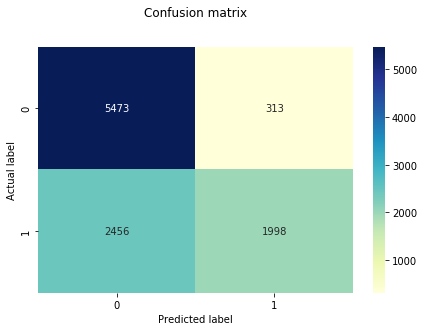

In [165]:
build_confusion_matrix(nb_pipeline_ngram)

Total statements classified:10240
Score:0.81416015625
Score length:5


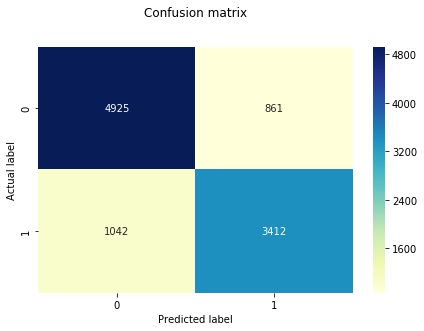

In [166]:
build_confusion_matrix(logR_pipeline_ngram)

Total statements classified:10240
Score:0.83330078125
Score length:5


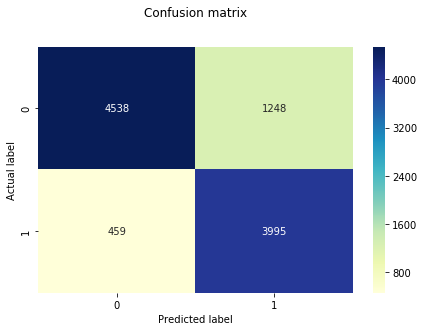

In [167]:
build_confusion_matrix(svm_pipeline_ngram)

Total statements classified:10240
Score:0.58046875
Score length:5


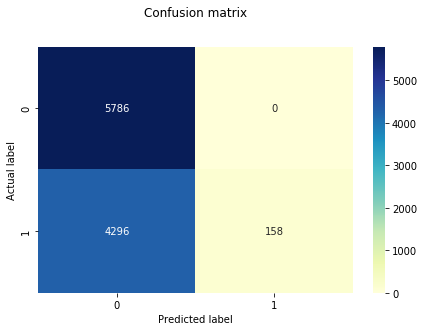

In [168]:
build_confusion_matrix(sgd_pipeline_ngram)

In [169]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['sensational_label'], predicted_nb_ngram))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['sensational_label'], predicted_LogR_ngram))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['sensational_label'], predicted_svm_ngram))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['sensational_label'], predicted_sgd_ngram))
print("\n Classification Report of RandomForestClassifier: \n")
print(classification_report(test_news['sensational_label'], predicted_rf_ngram))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.53      0.84      0.65       614
           1       0.67      0.31      0.42       653

   micro avg       0.56      0.56      0.56      1267
   macro avg       0.60      0.57      0.54      1267
weighted avg       0.60      0.56      0.53      1267


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       614
           1       0.64      0.53      0.58       653

   micro avg       0.60      0.60      0.60      1267
   macro avg       0.61      0.61      0.60      1267
weighted avg       0.61      0.60      0.60      1267


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       614
           1       0.63      0.64      0.63       653

   micro avg       0.62   

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with TF-IDF Vectorizer seems to be 62% accurate. 

## Doc2Vec

> Doc2Vec helps to form a fixed size vector for a full document. We can feed this document vector into a machine learning classification algorithm (an SVM or other) or you could calculate the cosine distance between two different document to determine how semantically similar they are. 

**doc2vec model** — Distributed Bag of Words (DBOW). In the word2vec architecture, the two algorithm names are “continuous bag of words” (CBOW) and “skip-gram” (SG); in the doc2vec architecture, the corresponding algorithms are “distributed memory” (DM) and “distributed bag of words” (DBOW).

**Distributed Bag of Words (DBOW)**
DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Parameters with explanation:

- If dm=0, distributed bag of words (PV-DBOW) is used; if dm=1,‘distributed memory’ (PV-DM) is used.
- 300- dimensional feature vectors.
- min_count=2, ignores all words with total frequency lower than this.
- negative=5 , specifies how many “noise words” should be drawn.
- hs=0 , and negative is non-zero, negative sampling will be used.
- sample=0 , the threshold for configuring which higher-frequency words are randomly down sampled.
- workers=cores , use these many worker threads to train the model (=faster training with multicore machines).


> dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm =0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order

In [170]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize

In [171]:
train_news.shape

(10240, 24)

In [172]:
train_news.index = range(10240)
train_news['clean'].apply(lambda x: len(x.split(' '))).sum()

109177

#### Tagged documents

In [179]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['sensational_label']]), axis=1)
    return tagged

In [180]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), tags=[r['sensational_label']]), axis=1)

In [181]:
sents = train_tagged.values
print("Train Tags: ", sents[20])

Train Tags:  TaggedDocument(['woman', 'men', 'make', 'le', 'adjust', 'inflate', 'john', 'kitab', 'first', 'elect', 'governor'], [0])


In [182]:
warnings.filterwarnings("ignore",category=UserWarning)
model = Doc2Vec(sents, size=1, window=100, iter=20, dm=1)

print(model.docvecs.count)
# model.build_vocab([x for x in tqdm(train_tagged)])

2


In [183]:
def train_doc2vec_model(tagged_docs, window, size):
    sents = tagged_docs.values
    doc2vec_model = Doc2Vec(sents, size=size, window=window, iter=20, dm=1)
    return doc2vec_model

#### Building the final vector feature for the classifier:

In [184]:
def vec_for_learning(doc2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

### Classifier Modeling using Doc2Vec

In [185]:
# Training and Test data with Doc2Vec 
# The vector has two sentiments values - positive and negative 
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
model = train_doc2vec_model(train_tagged, 100, 1)

y_train, X_train = vec_for_learning(model, train_tagged)
y_test, X_test = vec_for_learning(model, test_tagged)

In [186]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))


 X train dim:  10240

 y train dim:  10240

 X test dim:  1267

 y test dim: 1267


#### Building Classifier using Logistic regression

In [189]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['sensational_label']))
confusion_matrix(y_test,y_pred)

Accuracy:  0.49329123914759276


array([[558,  56],
       [586,  67]])

##### Building Classifier using Linear SVM Classifier

In [190]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['sensational_label']))
confusion_matrix(y_test,y_pred)

Accuracy:  0.494869771112865


array([[560,  54],
       [586,  67]])

##### Building Classifier using RandomForestClassifier

In [191]:
#random forest
r_forest = RandomForestClassifier(n_estimators=200,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['sensational_label']))
confusion_matrix(y_test,y_pred)

Accuracy:  0.4988161010260458


array([[352, 262],
       [373, 280]])

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [192]:
sgb = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=10)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['sensational_label']))
confusion_matrix(y_test,y_pred)

Accuracy:  0.4846093133385951


array([[614,   0],
       [653,   0]])

### Result:
#### Most of the models like Linear SVM,  LogisticRegression provides the maximum score as 50%.

## Compare Counter vs TF-IDF vs Doc2Vec

### Sensationalism Analysis Result

1. CounterVectorizer 


| Models  | Accuracy |
|---|---|
| Naive Bayes | 59.9% |
| Logistic Regression | 63% |
| Linear SVM classifier |63.45% |
| Stochastic Gradient Descent | 63.4% |
| Randome Forest Classifier | 61% |

2. TF-IDF Vectorizer 


|Models  | Accuracy |
|---|---|
| Naive Bayes | 56.4% |
| Logistic Regression | 60 % |
| Linear SVM classifier | 61% |
| Stochastic Gradient Descent | 48 % |
| Randome Forest Classifier | 57 % |

3. Doc2Vec 


|Models  | Accuracy |
|---|---|
| Logistic Regression | 49.3 % |
| Linear SVM classifier | 49.4% |
| Stochastic Gradient Descent | 48.4 % |
| Randome Forest Classifier | 49.8 % |


##### Inferences

The Count vectorization Linear SVM outnumbered both the TF-IDF and Doc2Vec because CountVectorization performes binary vectorization of words. Whereas TF-IDF takes probabilistic approach and gives more accurate score for each word. Doc2Vec wasn't rich or big enough for the actual news because of the limited content which wasn't enough for the model to understand to generate sensible embedding.  

Thus, as a team though my individual feature peroformed well in Count vectorization, we decided to classify the final vectorization using Doc2Vec. 

#### Tagged documents

In [193]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [194]:
#tag each headline text with the label found in previous step
def tag_docs(data, coltotag, colusedtotag):
    tagged_data = []
    for index, row in data.iterrows():
        tagged_data.append(TaggedDocument(words= row[coltotag].split(" "), tags=[row[colusedtotag]]))
    return tagged_data

In [195]:
#tag train data and run doc2vec model
sensational_labelled_train = tag_docs(train_news, 'clean', 'sensational_label')
print(sensational_labelled_train[:3])

[TaggedDocument(words=['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimmest', 'abort', 'demand'], tags=[1]), TaggedDocument(words=['decline', 'coal', 'start', 'start', 'natur', 'gas', 'took', 'start', 'begin', 'presid', 'george', 'w', 'bush', 'administr'], tags=[1]), TaggedDocument(words=['hillary', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'george', 'bush', 'benefit', 'doubt', 'iran'], tags=[1])]


In [196]:
#tag test data and run doc2vec model
sensational_labelled_test = tag_docs(test_news, 'clean', 'sensational_label')
print(sensational_labelled_test[:3])

[TaggedDocument(words=['build', 'wall', 'u', 'mexico', 'border', 'take', 'liter', 'year'], tags=[1]), TaggedDocument(words=['wisconsin', 'pace', 'doubl', 'number', 'layoff', 'year'], tags=[1]), TaggedDocument(words=['say', 'john', 'mccain', 'done', 'noth', 'help', 'vet'], tags=[1])]


In [197]:
doc2vec_model_sensational_train = Doc2Vec(documents = sensational_labelled_train,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_sensational_test= Doc2Vec(documents = sensational_labelled_test,
                              dm=0, num_features=500, min_count=2, size=21, window=4)

In [198]:
def create_docvector(doc2vec_model,label):
    return doc2vec_model.docvecs[label]

In [199]:
def apply_context_doc2vec(dflocal, doc2vec_model, vectorcolname, label):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: create_docvector(doc2vec_model, row[label]), axis=1)
    return dflocal

In [200]:
sensationaldoc2veccolumn = 'sensational_doc2vec_vector'
train_news = apply_context_doc2vec(train_news, doc2vec_model_sensational_train, sensationaldoc2veccolumn, 'sensational_label')
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score,sensational_label,sensational_doc2vec_vector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642192,obama state nation said million peopl work pre...,0.062867,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930747,percent year million state obama time rate peo...,0.082037,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486903,percent increas american peopl state year heal...,0.066665,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654537,health care state year cost would percent plan...,0.045124,0,"[1.15167, 0.17671461, -0.48284486, -1.1713078,..."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.453796,year last state million health vote creat numb...,0.102477,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,..."


In [201]:
test_news = apply_context_doc2vec(test_news, doc2vec_model_sensational_test, sensationaldoc2veccolumn, 'sensational_label')
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score,sensational_label,sensational_doc2vec_vector
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.620917,obama state nation said million peopl work pre...,0.080045,1,"[-1.1800162, 0.8395403, -1.7138841, -0.3265605..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.620392,year last state million health vote creat numb...,0.058766,1,"[-1.1800162, 0.8395403, -1.7138841, -0.3265605..."
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.547035,health care state year cost would percent plan...,0.060812,1,"[-1.1800162, 0.8395403, -1.7138841, -0.3265605..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849978,health care state year cost would percent plan...,0.043057,0,"[0.5945022, 0.47759902, -1.0854758, -1.1826954..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574275,health care state year cost would percent plan...,0.095836,1,"[-1.1800162, 0.8395403, -1.7138841, -0.3265605..."


# Merge the features and form final Vector

In [202]:
# Train news
def getSensationalfeaturetrainvector():
    sentiment = train_news.sentiment_score.reset_index()['sentiment_score']
    topic = train_news.lda_score.reset_index()['lda_score']
    sensational_doc2vec = []
    for i in range(len(train_news['sensational_label'])):
        sensational_value = train_news['sensational_label'][i]
        sensational = doc2vec_model_sensational_train[sensational_value]
        sensational_doc2vec.append(sensational)
    
    sensational_vector = pd.concat([sentiment, topic, pd.DataFrame(sensational_doc2vec)],axis=1)
    return sensational_vector

In [203]:
# Test news
def getSensationalfeaturetestvector():
    sentiment = test_news.sentiment_score.reset_index()['sentiment_score']
    topic = test_news.lda_score.reset_index()['lda_score']
    sensational_doc2vec = []
    for i in range(len(test_news['sensational_label'])):
        sensational_value = test_news['sensational_label'][i]
        sensational = doc2vec_model_sensational_test[sensational_value]
        sensational_doc2vec.append(sensational)
    
    sensational_vector = pd.concat([sentiment, topic, pd.DataFrame(sensational_doc2vec)],axis=1)
    return sensational_vector

In [204]:
sensational_train_vector = getSensationalfeaturetrainvector()
sensational_test_vector = getSensationalfeaturetestvector()

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [205]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

In [206]:
train_news['simplifiedLabel'] = train_news.apply(lambda row: simplify_label(row['label']), axis=1)
test_news['simplifiedLabel'] = test_news.apply(lambda row: simplify_label(row['label']), axis=1)

train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words,sensational_score,sensational_label,sensational_doc2vec_vector,simplifiedLabel
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0,0.2960,0,4,0.642192,obama state nation said million peopl work pre...,0.062867,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,...",0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0,0.0000,1,5,0.930747,percent year million state obama time rate peo...,0.082037,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,...",1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0,0.1280,2,6,0.486903,percent increas american peopl state year heal...,0.066665,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,...",1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,1,0.8402,3,8,0.654537,health care state year cost would percent plan...,0.045124,0,"[1.15167, 0.17671461, -0.48284486, -1.1713078,...",0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0,0.0000,4,7,0.453796,year last state million health vote creat numb...,0.102477,1,"[-0.773054, 0.7065288, -1.4615705, -0.4481422,...",1


## Classification Modeling on final vector 

In [207]:
#Get train and test data for classification
X_train = sensational_train_vector
y_train = train_news['simplifiedLabel']

X_test = sensational_test_vector
y_test = test_news['simplifiedLabel']

### Building Classifier using Support Vector Classifier

In [208]:
#perform vector classification using SVM
from sklearn.svm import SVC
fake_news_svm_classifier = SVC(kernel = 'linear', random_state = 42)
model = fake_news_svm_classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [209]:
#Method to calculate model accuracy, precision
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score


def estimate_score(y_test, y_pred):
    scores = []
    confusion = np.array([[0,0],[0,0]])
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    

    confusion += confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    scores.append(f1)
    
    print('\n\nTotal statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


Total statements classified:10240
Score:0.7208480565371024
Score length:1


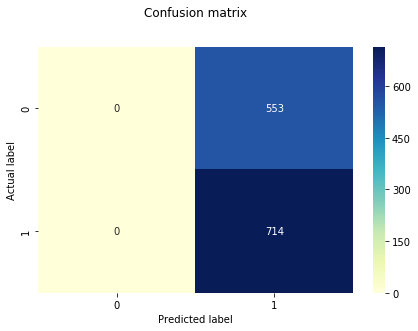

In [210]:
estimate_score(y_test, y_pred)

### Building Classifier using Logistic regression

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


Total statements classified:10240
Score:0.7208480565371024
Score length:1


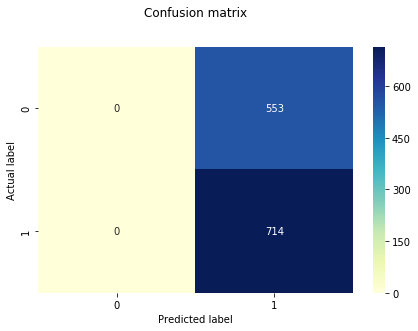

In [211]:
from sklearn.linear_model import  LogisticRegression
#perform vector classification using Logistic Regression
fake_news_classifier = LogisticRegression(random_state= 42, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

### Final Result: 

Based on the following features in the distilaltion process, the news article can be classified as fake or not with **56.3%** acccuracy

1. Sentiment Score
2. LDA Topic Score
3. Sensationalism 

## Write the final vector to the CSV file 

In [212]:
def write_to_csv(df, vector_data, filename):
    feature = []
    for index,row in vector_data.iterrows():
        feature.append(row.tolist())
    
    final_feature = []
    for i in range(len(df)):
        data = {}
        headline = df['headline_text'][i]
        encoded_label = df['simplifiedLabel'][i]
        sensational_vector = feature[i]
        data = {'headline_text': headline, 'encoded_label':encoded_label, 'sensational_vector': sensational_vector}
        final_feature.append(data)

    df = pd.DataFrame(final_feature)
    df.to_csv(filename, sep=',')

In [213]:
write_to_csv(train_news, X_train,"input_data/train_sensational_feature.csv" )
write_to_csv(test_news, X_test,"input_data/test_sensational_feature.csv" )